# Fake News Detector

### Alex Hedrick

### About the data (downloaded from Kaggle):

(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Published in:
IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).

0 = fake, 1 = real

In [11]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline
import nltk

# read data
news = pd.read_csv('news_data_2_recent/WELFake_Dataset.csv', sep=',', names = ['index','title','body','label'], header = None, skiprows = 1)
news = news.drop('index', axis=1)
news.head()

,title,body,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Data Preprocessing

In [3]:
# from warnings import simplefilter
# # ignore all future warnings
# simplefilter(action='ignore', category=FutureWarning)

# # remove all rows with missing values
# news = news.dropna()

# # only keep first 5000 rows of news
# news = news[:15000]

# # remove all non-alphanumeric characters from news
# news['title'] = news['title'].str.replace('[^a-zA-Z0-9]', ' ')
# news['body'] = news['body'].str.replace('[^a-zA-Z0-9]', ' ')

# # convert all news to lowercase
# news['title'] = news['title'].str.lower()
# news['body'] = news['body'].str.lower()

# # make objects in 'title' and 'body' strings
# news['title'] = news['title'].astype(str)
# news['body'] = news['body'].astype(str)

# # word tokenize news for lemmatizer
# news['title'] = news['title'].apply(nltk.word_tokenize)
# news['body'] = news['body'].apply(nltk.word_tokenize)

# # lemmatize news
# lemmatizer = nltk.stem.WordNetLemmatizer()
# news['title'] = news['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
# news['body'] = news['body'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

# # word tokenize news again
# # news['title'] = news['title'].apply(nltk.word_tokenize)
# # news['body'] = news['body'].apply(nltk.word_tokenize)

# # replace 0 with -1 for label
# # now, -1 = fake news, 1 = real news
# news['label'] = news['label'].replace(0, -1)

# news.head()

In [3]:
import string
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# remove all rows with missing values
news = news.dropna()

# # only keep first however many rows of news
# news = news[:15000]

# # define set of allowed characters
# allowed_chars = set(string.ascii_letters + string.digits + ' ')

# # remove non-alphanumeric characters from news
# news['title'] = news['title'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
# news['body'] = news['body'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))

# # convert all news to lowercase
# news['title'] = news['title'].str.lower()
# news['body'] = news['body'].str.lower()

# # lemmatize news
# lemmatizer = nltk.stem.WordNetLemmatizer()
# news['title'] = news['title'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)))
# news['body'] = news['body'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)))

# # replace 0 with -1 for label
# # now, -1 = fake news, 1 = real news
# news['label'] = news['label'].replace(0, -1)

# news.head()


### Data Visualization

In [5]:
# # make a word cloud of the most common words in the news titles and bodies
# from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)
# stopwords = ["s","wa","u","ha"] + list(STOPWORDS)

# # make a word cloud of the most common words in the news titles
# title_words = ' '.join(news['title'])
# title_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(title_words)

# # plot the WordCloud image
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(title_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.title('most common words in news titles')
# plt.show()


In [9]:
# most common words in news titles

# filter news by label 1
news_label1 = news[news['label'] == 1]

# filter news by label -1
news_labelminus1 = news[news['label'] == -1]

# set up stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["s", "wa", "u", "ha"])

# create WordCloud for label 1
title_words_label1 = ' '.join(news_label1['title'])
title_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_label1)

# create WordCloud for label -1
title_words_labelminus1 = ' '.join(news_labelminus1['title'])
title_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(title_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in REAL News Titles')
ax[0].axis('off')
ax[1].imshow(title_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in FAKE News Titles')
ax[1].axis('off')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
# # make a word cloud of the most common words in the news bodies
# body_words = ' '.join(news['body'])
# body_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(body_words)

# # plot the WordCloud image
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(body_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.title('most common words in news bodies')
# plt.show()

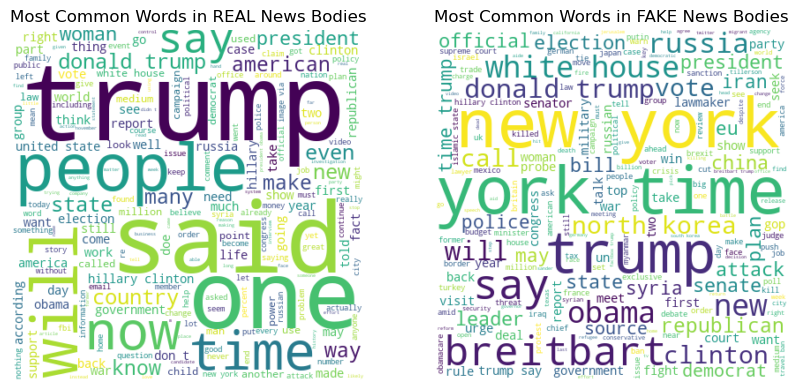

In [ ]:
# most common words in news bodies
# note: must run cell that creates news_label1 and news_labelminus1 first

# create WordCloud for label 1
body_words_label1 = ' '.join(news_label1['body'])
body_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_label1)

# create WordCloud for label -1
body_words_labelminus1 = ' '.join(news_labelminus1['title'])
body_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(body_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in REAL News Bodies')
ax[0].axis('off')
ax[1].imshow(body_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in FAKE News Bodies')
ax[1].axis('off')
plt.show()


From these word clouds, we can clearly see that most of the articles, fake and real, are about politics. Therefore, the classifier will be better at classifying an article if it is about politics and likely will not accurately predict fake news about sports, science, or other topics.

Furthermore, there are clear differences between the word clouds. Hopefully, we can exploit these differences and create a classifier that can reasonably accurately classify whether an article is fake or not just by looking at how often the most common words appear in the title and body of the article.

### Generate Multinomial Features

Generate multinomial features based on the number of occurrences of the most common words in 'title' and 'body' using sklearn CountVectorizer

In [4]:
# generate multinomial features based on the number of occurrences of a set of words in the message using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 

more_stop_words = ["s", "wa", "u", "ha"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

# split messages into training and validation sets
# validation_data_length = 4000
# validation_data_length = 4000

xtrain, xvali, training_labels, vali_labels = train_test_split(news['body'], news['label'], test_size=0.33, random_state=1)

# news_training = news.iloc[:-validation_data_length,:]
# news_validation = news.iloc[-validation_data_length:,:]

# return the number of unique words in all training data
# def get_unique_words_count(training_data):
#     unique_words = set()
#     for message in training_data:
#         for word in message.split():
#             unique_words.add(word)
#     return len(unique_words)

# print(f'number of unique words: {get_unique_words_count(xtrain)}')


# look at only most frequent m words
# m = 130000

# apply CountVectorizer to messages
# count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=m)
count_vectorizer = CountVectorizer(stop_words=stop_words)

# get count features for training data
training_features = count_vectorizer.fit_transform(xtrain)

# get count features for vali data
vali_features = count_vectorizer.transform(xvali)

# now we have a list of count features and feature names for each value of m
print(training_features.shape)
print(vali_features.shape)

(47929, 199433)
(23608, 199433)


### SKLearn Algorithms

I start with various SKLearn machine learning algorithm implementations because they are much faster than mine. I perform a number of trials to determine optimal prediction parameters then run these parameters on my own code.

#### Parameters to test:
- class_weight = 'balanced' or not
- check svc documentation and look for more sklearn params
- number of words (m)
- how much influence 'title' has vs. 'body' text
- training data length
- 'c' value for soft svm
- type of kernel 'linear' vs others

#### SKLearn SVM

In [12]:
# from sklearn.svm import SVC

# # implement soft-margin SVM
# c = 0.01

# # use sklearn's svc to classify the datasets 
# # find separator
# clf = SVC(C=c, kernel='linear', class_weight='balanced')
# clf.fit(training_features, training_labels)

# # predictor and validation loss
# ysvm = clf.predict(vali_features)
# ysvm = np.int0(ysvm)

# print(classification_report(vali_labels, ysvm))

#### SKLearn Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11515
           1       0.91      0.88      0.89     12093

    accuracy                           0.89     23608
   macro avg       0.89      0.89      0.89     23608
weighted avg       0.89      0.89      0.89     23608



Text(70.72222222222221, 0.5, 'Real Labels')

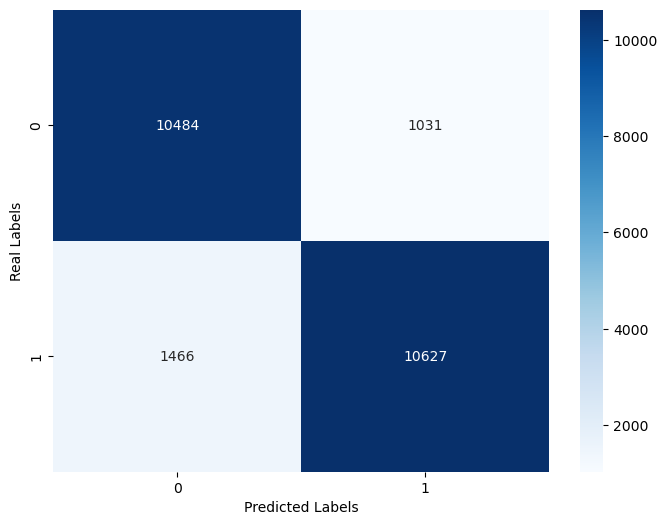

In [5]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

# classifier
nb_classifier.fit(training_features, training_labels)

# predictor
ybayes = nb_classifier.predict(vali_features)

# print classification report
print(classification_report(vali_labels, ybayes))

# print confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(vali_labels,ybayes), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

#### SKLearn K-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier
k = [10, 100, 1000]
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(training_features, training_labels)
    print('Accuracy for k = ' + str(i) + ' is ' + str(np.round(100*knn.score(vali_features, vali_labels),3)) + '%')

Accuracy for k = 10 is 76.144%
Accuracy for k = 100 is 70.722%
Accuracy for k = 1000 is 63.381%


In [8]:
i = 1
knn = KNeighborsClassifier(n_neighbors = i)
knn.fit(training_features, training_labels)
print('Accuracy for k = ' + str(i) + ' is ' + str(np.round(100*knn.score(vali_features, vali_labels),3)) + '%')

Accuracy for k = 1 is 81.078%


#### SKLearn Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# classifier
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(training_features, training_labels)

# predictor
yrf = rf_classifier.predict(vali_features)

print(classification_report(vali_labels, yrf))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11515
           1       0.94      0.94      0.94     12093

    accuracy                           0.94     23608
   macro avg       0.94      0.94      0.94     23608
weighted avg       0.94      0.94      0.94     23608



Text(70.72222222222221, 0.5, 'Real Labels')

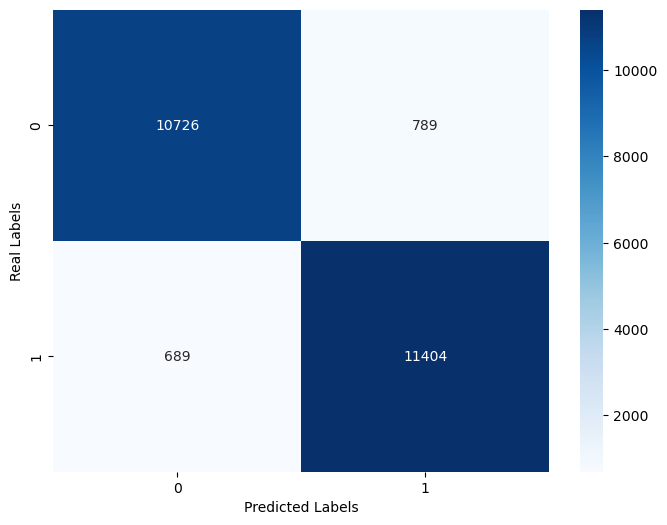

In [10]:
# print confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(vali_labels,yrf), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')